In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [29]:
import pandas as pd

# Load the cleaned CSV file
file_path = "Final.csv"  # Update with your actual file path
df_cleaned = pd.read_csv(file_path)

# Normalize column names to avoid mismatches
df_cleaned.columns = df_cleaned.columns.str.strip()  # Remove leading/trailing spaces
df_cleaned.columns = df_cleaned.columns.str.lower()  # Convert to lowercase for consistency

df_cleaned.columns


Index(['county subdivision', 'year', 'median household income',
       'median home value', 'county', 'latitude', 'longitude'],
      dtype='object')

In [30]:

# Load and clean the CSV file
file_path = "Final.csv"  # Update with your actual file path
df_cleaned = pd.read_csv(file_path)

# Normalize column names to avoid mismatches
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower()  # Remove leading/trailing spaces and convert to lowercase

# Rename 'county subdivision' to 'subdivision' and clean the names
df_cleaned = df_cleaned.rename(columns={'county subdivision': 'subdivision'})
df_cleaned["subdivision"] = df_cleaned["subdivision"].str.replace(" CCD", "", regex=False).str.replace(" County", "", regex=False)

# Display the cleaned dataframe
df_cleaned


,subdivision,year,median household income,median home value,county,latitude,longitude
0,"Beavercreek, Clackamas, Oregon",2023,122212,660600,Clackamas,45.287929,-122.535342
1,"Beavercreek, Clackamas, Oregon",2022,114926,644600,Clackamas,45.287929,-122.535342
2,"Beavercreek, Clackamas, Oregon",2021,101283,522900,Clackamas,45.287929,-122.535342
3,"Beavercreek, Clackamas, Oregon",2020,99750,501200,Clackamas,45.287929,-122.535342
4,"Beavercreek, Clackamas, Oregon",2019,93279,468400,Clackamas,45.287929,-122.535342
...,...,...,...,...,...,...,...
110,"Yoder, Clackamas, Oregon",2023,109921,719800,Clackamas,45.138177,-122.681757
111,"Yoder, Clackamas, Oregon",2022,110688,673600,Clackamas,45.138177,-122.681757
112,"Yoder, Clackamas, Oregon",2021,96365,560200,Clackamas,45.138177,-122.681757
113,"Yoder, Clackamas, Oregon",2020,87969,517400,Clackamas,45.138177,-122.681757


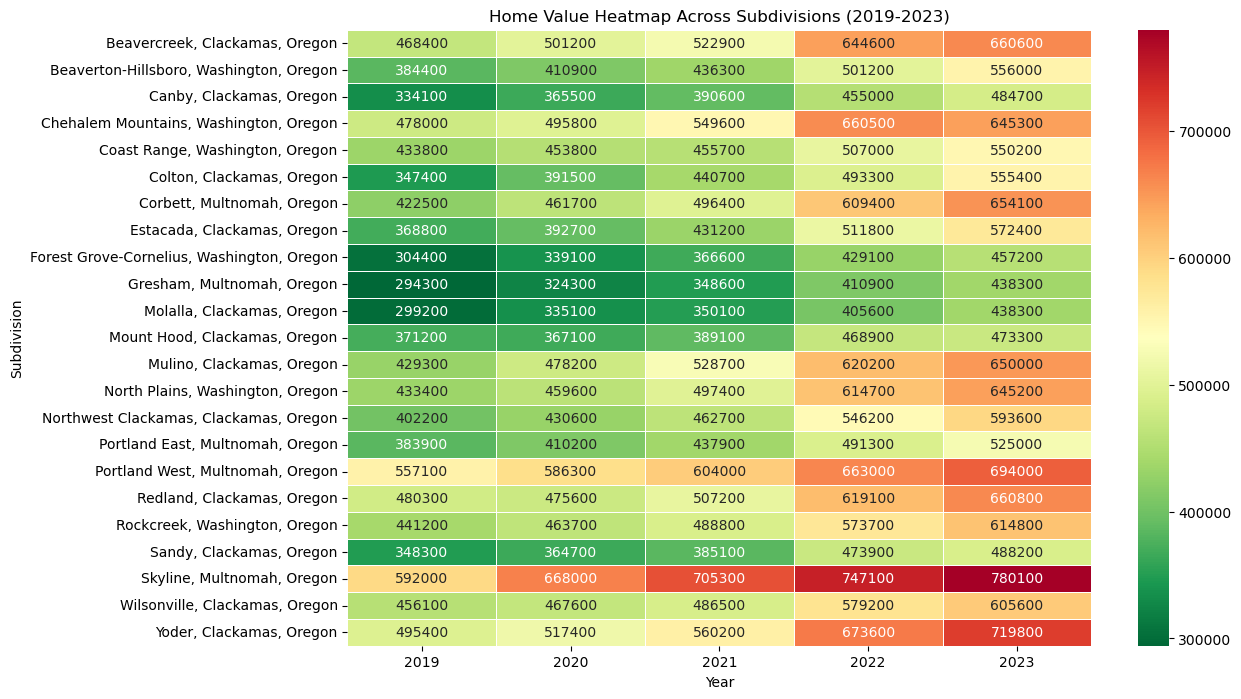

In [31]:
# Load the cleaned dataset
file_path = "Final.csv"  
df_cleaned = pd.read_csv(file_path)

# Normalize column names to avoid mismatches
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower()
df_cleaned = df_cleaned.rename(columns={'county subdivision': 'subdivision'})
df_cleaned["subdivision"] = df_cleaned["subdivision"].str.replace(" CCD", "", regex=False).str.replace(" County", "", regex=False)

# Now create the wide format data for the heatmap
df_wide = df_cleaned.pivot(index='subdivision', columns='year', values='median home value')

# Create a heatmap for each subdivision with a red-to-green color scale
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_wide, 
    annot=True, 
    fmt=".0f", 
    cmap="RdYlGn_r",  # Red for expensive, Green for least expensive
    linewidths=0.5
)

# Customize the plot
plt.title("Home Value Heatmap Across Subdivisions (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Subdivision")

# Show the heatmap
plt.show()


In [32]:
# Load the cleaned dataset
file_path = "Final.csv"
df_cleaned = pd.read_csv(file_path)

# Ensure "Year" is numeric
df_cleaned["Year"] = pd.to_numeric(df_cleaned["Year"], errors="coerce")

# Drop rows with missing latitude and longitude values
df_cleaned = df_cleaned.dropna(subset=["Latitude", "Longitude"])

# Create an interactive scatter map for all years
fig = px.scatter_mapbox(
    df_cleaned,
    lat='Latitude',
    lon='Longitude',
    size="Median Home Value",
    color="Median Home Value",
    hover_name="County Subdivision",  # Corrected column name
    hover_data=["County", "Median Home Value", "Year"],
    animation_frame="Year",  # Include all years with animation
    mapbox_style="carto-positron",
    color_continuous_scale=["green", "yellow", "red"],  # Custom color scale
    title="Median Home Values by Subdivisions Over the Years"
)

# Increase figure size
fig.update_layout(
    autosize=True,
    width=1200,
    height=800
)

# Show the interactive map
fig.show()


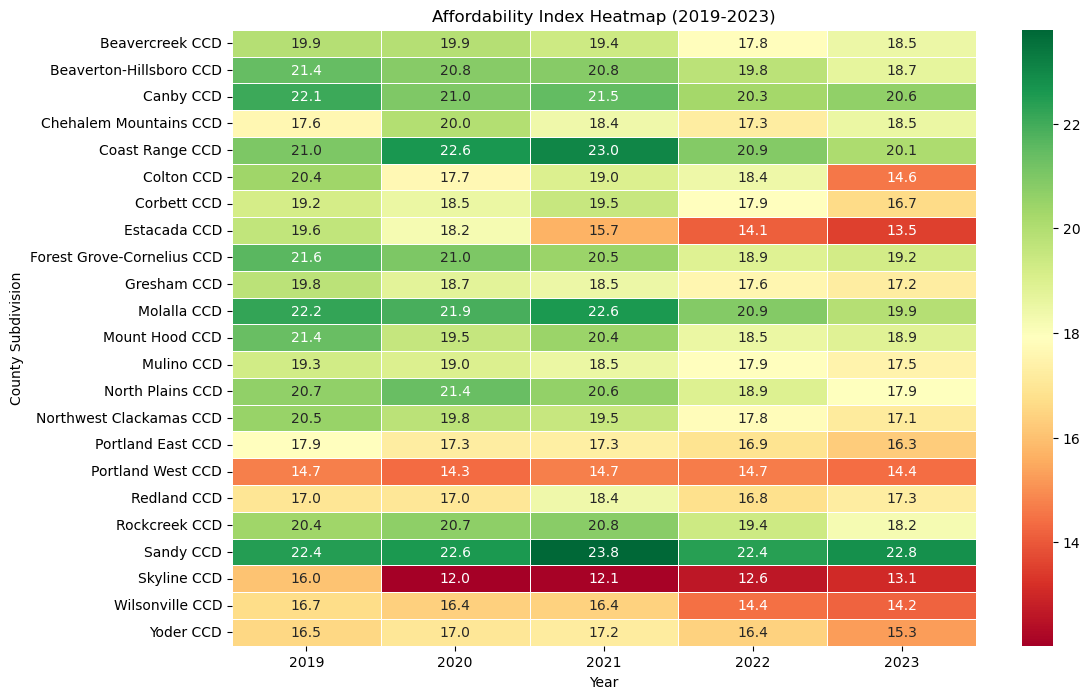

In [33]:

# Load the dataset
file_path = "Final.csv"
affordability_df = pd.read_csv(file_path)

# Normalize column names to avoid mismatches
affordability_df.columns = affordability_df.columns.str.strip().str.lower()

# Calculate the Affordability Index
affordability_df['affordability index'] = (affordability_df['median household income'] / affordability_df['median home value']) * 100

# Clean County Subdivision names by removing county and state information
affordability_df['county subdivision'] = affordability_df['county subdivision'].str.split(',').str[0]

# Pivot the data for heatmap
heatmap_data = affordability_df.pivot(index='county subdivision', columns='year', values='affordability index')

# Create the heatmap with Red (More Affordable) → Green (Less Affordable)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='RdYlGn', annot=True, fmt=".1f", linewidths=0.5)

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('County Subdivision')
plt.title('Affordability Index Heatmap (2019-2023)')

# Show the heatmap
plt.show()


In [34]:

# Load the cleaned dataset
file_path = "Final.csv"  
affordability_df = pd.read_csv(file_path)

# Calculate the Affordability Index
affordability_df["Affordability Index"] = (affordability_df["Median Household Income"] / affordability_df["Median Home Value"]) * 100

# Ensure "Year" is numeric
affordability_df["Year"] = pd.to_numeric(affordability_df["Year"], errors="coerce")

# Drop rows with missing latitude and longitude values
affordability_df = affordability_df.dropna(subset=["Latitude", "Longitude"])

# Create an interactive scatter map for Affordability Index
fig = px.scatter_mapbox(
    affordability_df,
    lat='Latitude',
    lon='Longitude',
    size="Affordability Index",
    color="Affordability Index",
    hover_name="County Subdivision",
    hover_data=["County", "Affordability Index", "Year"],
    animation_frame="Year",  # Include all years with animation
    mapbox_style="carto-positron",
    color_continuous_scale=["red", "yellow", "green"],  # Red (Less Affordable) → Green (More Affordable)
    title="Affordability Index by Subdivisions Over the Years"
)

# Increase figure size
fig.update_layout(
    autosize=True,
    width=1200,
    height=800
)

# Show the interactive map
fig.show()
